In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, ttest_ind
from scipy.stats import chi2, chi2_contingency
from scipy.stats import levene, kruskal

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# reading the csv file
df = pd.read_csv("walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**The data does not contain any nulls, thus no need of handling the missing data. We have 550068 rows and 10 columns**

In [ ]:
# Checking datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
# Converting categorical data types into category
df["User_ID"] = df["User_ID"].astype('category')
df["Product_ID"] = df["Product_ID"].astype('category')
df["Gender"] = df["Gender"].astype('category')
df["Age"] = df["Age"].astype('category')
df["Occupation"] = df["Occupation"].astype('category')
df["City_Category"] = df["City_Category"].astype('category')
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype('category')
df["Marital_Status"] = df["Marital_Status"].astype('category')
df["Product_Category"] = df["Product_Category"].astype('category')

df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

In [ ]:
# Checking for duplicate rows
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


**No Duplicate entries found in the data**

In [ ]:
# Number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


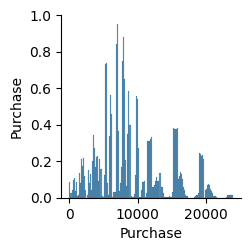

In [ ]:
sns.pairplot(df)

In [ ]:
# Looking at gender counts
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

**The purchase data for females is significantly less than the males for Black Friday.**

In [ ]:
# Looking at the counts of age categories
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

**The age group of 26-35 shops the most while 0-17 years the least. This can be attributed to the fact that 0-17 age groups are normally accompanied by guardians or do not earn so would be spending least. The spending also reduces as age increases further.**

In [ ]:
# Looking at marital status counts
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

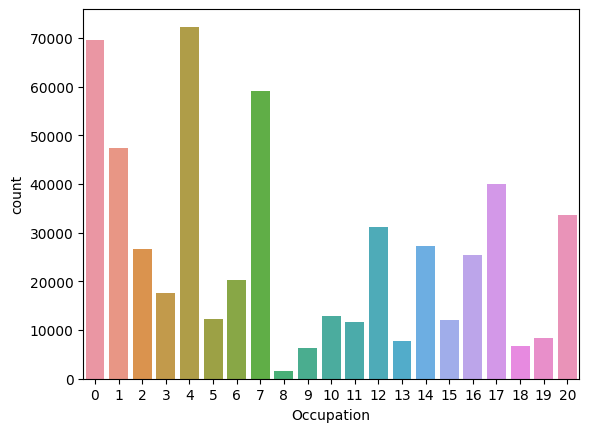

In [ ]:
# Looking at occupation counts
sns.countplot(x=df['Occupation'])

**There are many people with occupation 0, 4 and 7, while the ones with 8, 9 and 18 are the least.**

In [ ]:
# Looking at city catergories
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

**The counts of the cities A and C are similar, while B saw the most number of purchases.**

In [ ]:
# Looking at stay in the current cities
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

**The places where the stay is 1 and 2 years have seen more purchases.**

<Axes: xlabel='Product_Category', ylabel='count'>

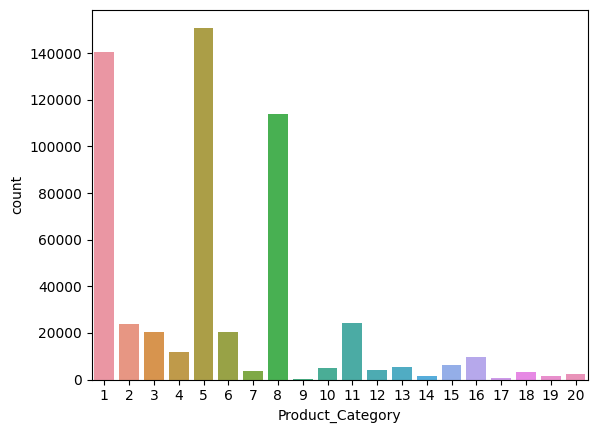

In [ ]:
# Looking at product category counts
sns.countplot(x=df['Product_Category'])

**The product categories 1, 5 and 8 have been bought way more times than others.**

In [ ]:
# Looking at the sale of products
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase_binned', ylabel='count'>

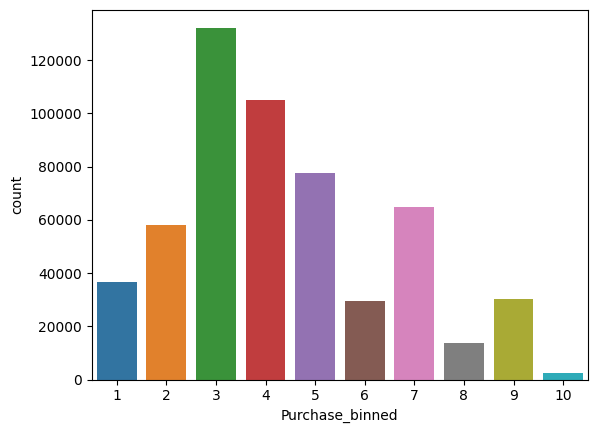

In [ ]:
# To check for the purchase data, we bin it into 10 categories and see what amount range is most used.
bins = np.arange(0, 25000, 2400)
labels = np.arange(1, 11)

df['Purchase_binned'] = pd.cut(df['Purchase'], bins=bins, labels=labels)

sns.countplot(x=df['Purchase_binned'])

**The amount 7200-12000 is the most purchased amount.**

<Axes: xlabel='Gender', ylabel='Purchase'>

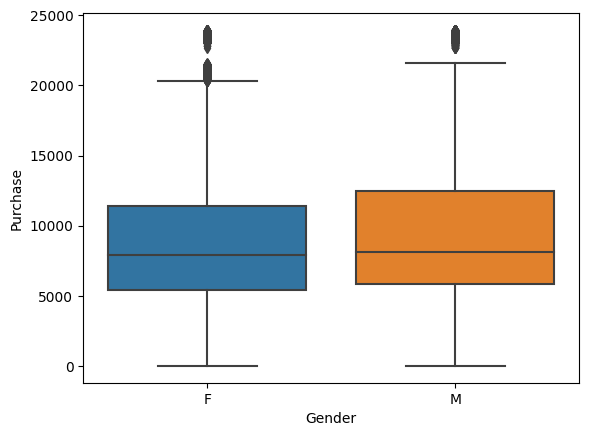

In [ ]:
# Checking the distribution of male and female customers in the purchase
sns.boxplot(data = df, x = 'Gender', y = 'Purchase')

**There are a significant amount of people (both male and female) who have purchased extraordinary amounts. The average, though, is approximately the same for both the genders.**

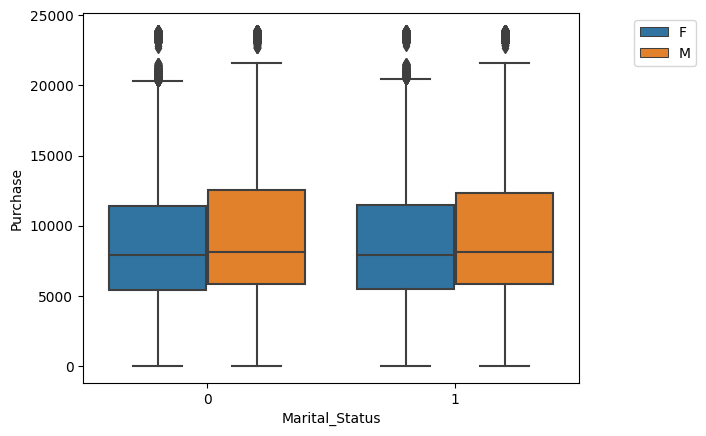

In [ ]:
# Checking the distribution of marital status in the purchase
sns.boxplot(data = df, x = 'Marital_Status', y = 'Purchase', hue = 'Gender')
plt.legend(bbox_to_anchor=(1.25, 1))

**The boxplots are almost identical for both married and unmarried people.**

<Axes: xlabel='Age', ylabel='Purchase'>

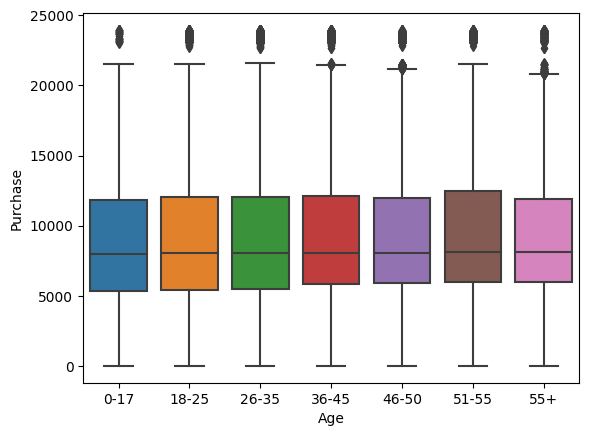

In [ ]:
# Checking the distribution of customers by age in the purchase
sns.boxplot(data = df, x = 'Age', y = 'Purchase', order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

**The stretch of the plot, the minimum and the maximum vary a little. The average almost remains the same.**

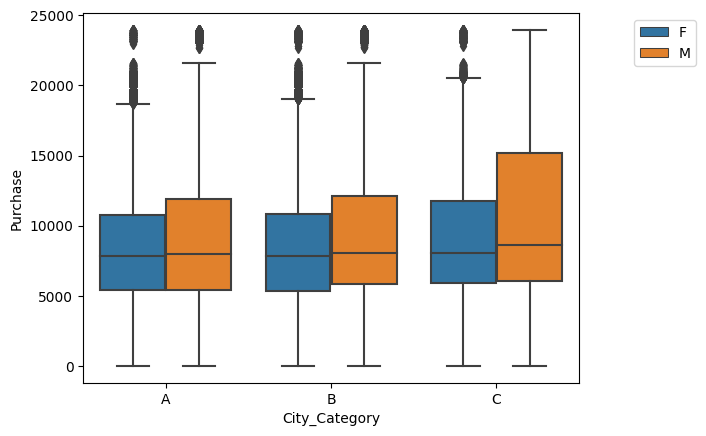

In [ ]:
# Checking the distribution of cities in the purchase
sns.boxplot(data = df, x = 'City_Category', y = 'Purchase', hue = 'Gender')
plt.legend(bbox_to_anchor=(1.25, 1))

**City C sees a good participation from males. The other cities have similar data.**

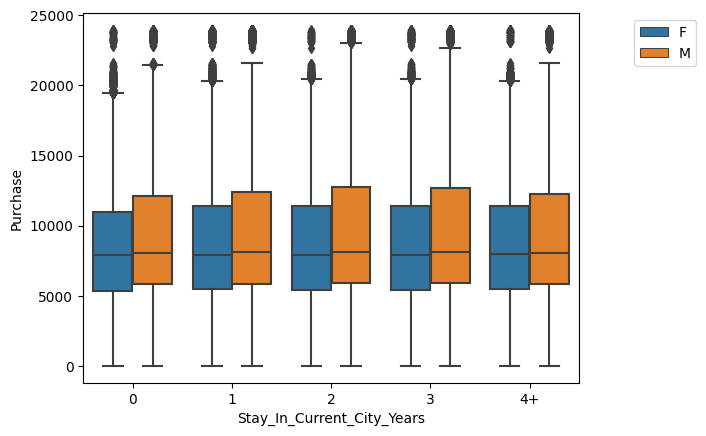

In [ ]:
# Checking the distribution of cities in the purchase
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', order = ['0', '1', '2', '3', '4+'])
plt.legend(bbox_to_anchor=(1.25, 1))

In [ ]:
# Checking purchase based on occupation
df_occ_purchase_sum = df[['Occupation', 'Purchase']].groupby('Occupation')['Purchase'].sum().reset_index(name='SumPurchase')
df_occ_purchase_avg = df[['Occupation', 'Purchase']].groupby('Occupation')['Purchase'].mean().reset_index(name='AvgPurchase')
df_occ_count = df['Occupation'].value_counts().reset_index(name='NoOfPeople').rename(columns = {'index':'Occupation'})

df_temp = None
df_temp = pd.merge(df_occ_purchase_sum, df_occ_count, on='Occupation', how='inner')
df_temp = pd.merge(df_temp, df_occ_purchase_avg, on='Occupation', how='inner')
df_temp

,Occupation,SumPurchase,NoOfPeople,AvgPurchase
0,0,635406958,69638,9124.428588
1,1,424614144,47426,8953.193270
2,2,238028583,26588,8952.481683
3,3,162002168,17650,9178.593088
4,4,666244484,72308,9213.980251
5,5,113649759,12177,9333.149298
6,6,188416784,20355,9256.535691
7,7,557371587,59133,9425.728223
8,8,14737388,1546,9532.592497
9,9,54340046,6291,8637.743761


<Axes: xlabel='Occupation', ylabel='AvgPurchase'>

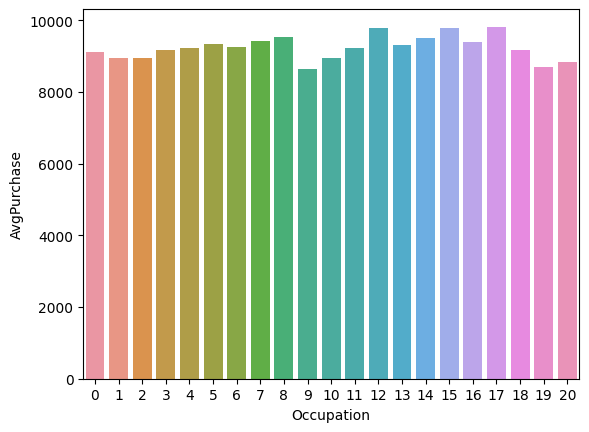

In [ ]:
sns.barplot(data = df_temp, x = 'Occupation', y = 'AvgPurchase')

**The average purchase of people with all occupations has been in the range of 8000 to 10000.**

## **Analysis of Gender v/s Purchase**

In [ ]:
df_gender_purchase_stats = pd.crosstab(df['Purchase_binned'], df['Gender'], margins = True)
df_gender_purchase_stats

Gender,F,M,All
Purchase_binned,,,
1,10237,26607,36844
2,13966,43951,57917
3,36447,95830,132277
4,28133,76883,105016
5,18555,58920,77475
6,6853,22548,29401
7,12617,52110,64727
8,2576,11092,13668
9,5887,24506,30393


In [ ]:
df_gender_purchase_normalised = pd.crosstab(index=df['Purchase_binned'], columns=df['Gender'], margins = True, normalize = 'columns')
df_gender_purchase_normalised

Gender,F,M,All
Purchase_binned,,,
1,0.075378,0.064228,0.066981
2,0.102836,0.106095,0.105291
3,0.268370,0.231329,0.240474
4,0.207151,0.185592,0.190915
5,0.136626,0.142230,0.140846
6,0.050461,0.054430,0.053450
7,0.092903,0.125791,0.117671
8,0.018968,0.026776,0.024848
9,0.043348,0.059156,0.055253


**We can check if the purchase is dependent on the gender by having a chi square test of independence where the two categorical data are 'Gender' and 'Purchase_binned'.**

**Ho : The two columns are independent.**

**Ha : The two columns are dependent.**

**We take 95% confidence interval for all analyses here.**

In [ ]:
chi_stat, p_value, dof, expected_values = chi2_contingency(df_gender_purchase_stats[['F', 'M']].iloc[:-1:, ::])
print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
  print("The Gender and Purchase columns are independent (Fail to reject Ho).")
else :
  print("The Gender and Purchase columns are dependent (Reject Ho).")

p_value:  0.0
The Gender and Purchase columns are dependent (Reject Ho).


**From the chi-square test, we see that purchase is indeed dependent on the gender.**

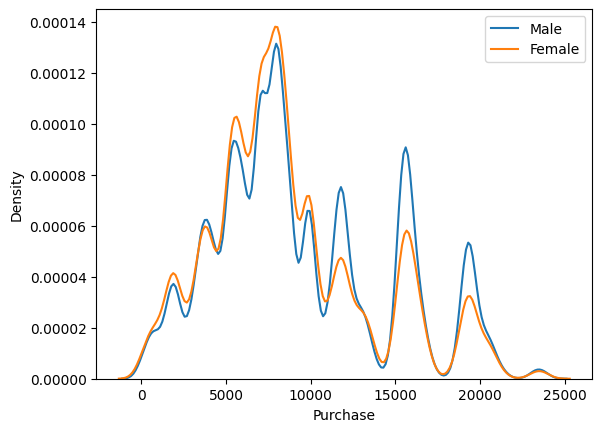

In [ ]:
# Plotting the density function for the genders.
sns.kdeplot(df[df['Gender'] == 'M']['Purchase'], label = 'Male')
sns.kdeplot(df[df['Gender'] == 'F']['Purchase'], label = 'Female')
plt.legend()

**We see that the data is not normally distributed. We take samples from the available data and take their means. According to CLT, the means will be normally distributed and we can then move forward with the t-test.**

In [ ]:
# Taking samples means of males and females. We take two sample sizes for comparison.
sample_female_20 = [np.mean(df[df['Gender'] == 'F']["Purchase"].sample(20)) for i in range(1000)]
sample_male_20 = [np.mean(df[df['Gender'] == 'M']["Purchase"].sample(20)) for i in range(1000)]

sample_female_50 = [np.mean(df[df['Gender'] == 'F']["Purchase"].sample(50)) for i in range(1000)]
sample_male_50 = [np.mean(df[df['Gender'] == 'M']["Purchase"].sample(50)) for i in range(1000)]

In [ ]:
# Taking means, std errors and intervals of the sample means
sample_mean_female_20 = np.mean(sample_female_20) # sample mean gives an idea of the population mean
sample_stddev_female_20 = np.std(sample_female_20)
interval_95_female_20 = norm.interval(0.95, loc = sample_mean_female_20, scale = sample_stddev_female_20)
interval_99_female_20 = norm.interval(0.99, loc = sample_mean_female_20, scale = sample_stddev_female_20)

print("For Female with sample size 20:")
print("Sample mean:", sample_mean_female_20)
print("Sample std dev:", sample_stddev_female_20)
print("95% confidence interval:", interval_95_female_20)
print("99% confidence interval:", interval_99_female_20)
print()

print("For Male with sample size 20:")
sample_mean_male_20 = np.mean(sample_male_20)
sample_stddev_male_20 = np.std(sample_male_20)
interval_95_male_20 = norm.interval(0.95, loc = sample_mean_male_20, scale = sample_stddev_male_20)
interval_99_male_20 = norm.interval(0.99, loc = sample_mean_male_20, scale = sample_stddev_male_20)

print("Sample mean:", sample_mean_male_20)
print("Sample std dev:", sample_stderr_male_20)
print("95% confidence interval:", interval_95_male_20)
print("99% confidence interval:", interval_99_male_20)

For Female with sample size 20:
Sample mean: 8752.568600000002
Sample std dev: 1074.8336258645054
95% confidence interval: (6645.933403932973, 10859.203796067031)
99% confidence interval: (5983.980650058495, 11521.15654994151)

For Male with sample size 20:
Sample mean: 9409.7442
Sample std dev: 265.05826778949563
95% confidence interval: (7086.448737163233, 11733.039662836765)
99% confidence interval: (6356.41639337629, 12463.072006623708)


In [ ]:
# Taking means, std errors and intervals of the sample means
sample_mean_female_50 = np.mean(sample_female_50)
sample_stddev_female_50 = np.std(sample_female_50)
interval_95_female_50 = norm.interval(0.95, loc = sample_mean_female_50, scale = sample_stddev_female_50)
interval_99_female_50 = norm.interval(0.99, loc = sample_mean_female_50, scale = sample_stddev_female_50)

print("For Female with sample size 50:")
print("Sample mean:", sample_mean_female_50)
print("Sample std dev:", sample_stderr_female_50)
print("95% confidence interval:", interval_95_female_50)
print("99% confidence interval:", interval_99_female_50)
print()


sample_mean_male_50 = np.mean(sample_male_50)
sample_stddev_male_50 = np.std(sample_male_50)
interval_95_male_50 = norm.interval(0.95, loc = sample_mean_male_50, scale = sample_stddev_male_50)
interval_99_male_50 = norm.interval(0.99, loc = sample_mean_male_50, scale = sample_stddev_male_50)

print("For Male with sample size 50:")
print("Sample mean:", sample_mean_male_50)
print("Sample std dev:", sample_stderr_male_50)
print("95% confidence interval:", interval_95_male_50)
print("99% confidence interval:", interval_99_male_50)

For Female with sample size 50:
Sample mean: 8678.411600000001
Sample std dev: 99.84837237714393
95% confidence interval: (7294.609188674256, 10062.214011325746)
99% confidence interval: (6859.786957133948, 10497.036242866056)

For Male with sample size 50:
Sample mean: 9423.249679999999
Sample std dev: 103.69622678079443
95% confidence interval: (7986.119707338654, 10860.379652661344)
99% confidence interval: (7534.540741576201, 11311.958618423796)


**The means for the sample sizes of 20 and 50 give us a similar result, while standard error reduces to a great extent when we take 50 samples. We can infer that the average amount for the purchase for female population will lie in the interval (7294.609, 10062.214). For males, this interval would be (7986.119, 10860.379). This can be said with 95% probability.**

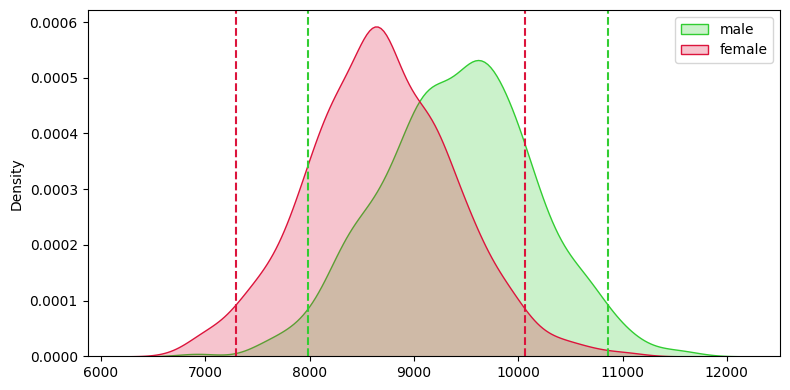

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(data = sample_male_50, color = 'limegreen', label = 'male', fill = True, ax = ax)
sns.kdeplot(data = sample_female_50, color = 'crimson', label = 'female', fill = True, ax = ax)
ax.legend()

for i in interval_95_female_50:
  plt.axvline(x = i, linestyle = '--', color = 'crimson')

for i in interval_95_male_50:
  plt.axvline(x = i, linestyle = '--', color = 'limegreen')

plt.tight_layout()
plt.show()

**The 95% confidence intervals of the sample means of the genders overlap for some area. Since men on an average spend more than women, the products can be accordingly marketed and kept in the store. Also, the items for women can be put up on discounts so that their spending increases.**

**We have sample means of the genders with us. We can go with the t-test now.**

**Ho : The purchase amount of both the genders is the same.**

**Ha : The purchase amount of males is more than the females.**

In [ ]:
tstat, p_value = ttest_ind(sample_male_50, sample_female_50, alternative = 'greater')

print("tstat: ", tstat)
print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
  print("The purchase amount of both the genders is the same (Fail to reject Ho).")
else :
  print("The purchase amount of males is more than the females (Reject Ho).")

tstat:  23.127966006940007
p_value:  2.3302542479112263e-105
The purchase amount of males is more than the females (Reject Ho).


## **Analysis of Marital Status v/s Purchase**

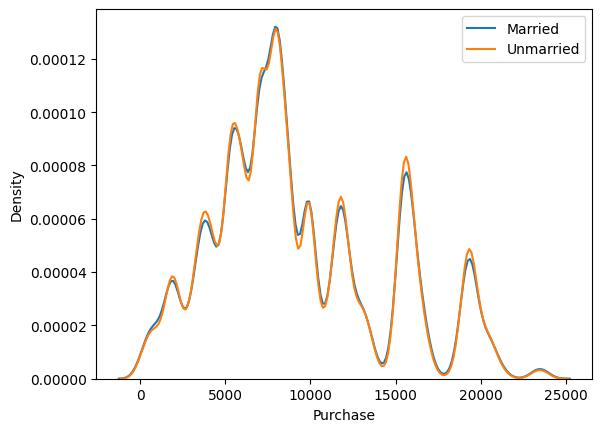

In [ ]:
# Plotting the density function for the marital status.
sns.kdeplot(df[df['Marital_Status'] == 1]['Purchase'], label = 'Married')
sns.kdeplot(df[df['Marital_Status'] == 0]['Purchase'], label = 'Unmarried')
plt.legend()

In [ ]:
# Taking samples means of males and females. We take two sample sizes for comparison.
sample_marr_20 = [np.mean(df[df['Marital_Status'] == 1]["Purchase"].sample(20)) for i in range(1000)]
sample_unmarr_20 = [np.mean(df[df['Marital_Status'] == 0]["Purchase"].sample(20)) for i in range(1000)]

sample_marr_50 = [np.mean(df[df['Marital_Status'] == 1]["Purchase"].sample(50)) for i in range(1000)]
sample_unmarr_50 = [np.mean(df[df['Marital_Status'] == 0]["Purchase"].sample(50)) for i in range(1000)]

In [ ]:
# Taking means, std errors and intervals of the sample means
sample_mean_marr_20 = np.mean(sample_marr_20)
sample_stddev_marr_20 = np.std(sample_marr_20)
interval_95_marr_20 = norm.interval(0.95, loc = sample_mean_marr_20, scale = sample_stddev_marr_20)

print("For married people with sample size 20:")
print("Sample mean:", sample_mean_marr_20)
print("Sample std dev:", sample_stddev_marr_20)
print("95% confidence interval:", interval_95_marr_20)
print()

print("For unmarried people with sample size 20:")
sample_mean_unmarr_20 = np.mean(sample_unmarr_20)
sample_stddev_unmarr_20 = np.std(sample_unmarr_20)
interval_95_unmarr_20 = norm.interval(0.95, loc = sample_mean_unmarr_20, scale = sample_stddev_unmarr_20)
print("Sample mean:", sample_mean_unmarr_20)
print("Sample std dev:", sample_stddev_unmarr_20)
print("95% confidence interval:", interval_95_unmarr_20)

For married people with sample size 20:
Sample mean: 9322.299050000001
Sample std dev: 1119.208374125032
95% confidence interval: (7128.690945519309, 11515.907154480694)

For unmarried people with sample size 20:
Sample mean: 9305.68145
Sample std dev: 1096.0957092464132
95% confidence interval: (7157.373336268143, 11453.989563731857)


In [ ]:
# Taking means, std errors and intervals of the sample means
sample_mean_marr_50 = np.mean(sample_marr_50)
sample_stddev_marr_50 = np.std(sample_marr_50)
interval_95_marr_50 = norm.interval(0.95, loc = sample_mean_marr_50, scale = sample_stddev_marr_50)
interval_99_marr_50 = norm.interval(0.99, loc = sample_mean_marr_50, scale = sample_stddev_marr_50)

print("For married people with sample size 50:")
print("Sample mean:", sample_mean_marr_50)
print("Sample std dev:", sample_stddev_marr_50)
print("95% confidence interval:", interval_95_marr_50)
print("99% confidence interval:", interval_99_marr_50)
print()


sample_mean_unmarr_50 = np.mean(sample_unmarr_50)
sample_stddev_unmarr_50 = np.std(sample_unmarr_50)
interval_95_unmarr_50 = norm.interval(0.95, loc = sample_mean_unmarr_50, scale = sample_stddev_unmarr_50)
interval_99_unmarr_50 = norm.interval(0.99, loc = sample_mean_unmarr_50, scale = sample_stddev_unmarr_50)

print("For unmarried people with sample size 50:")
print("Sample mean:", sample_mean_unmarr_50)
print("Sample std dev:", sample_stddev_unmarr_50)
print("95% confidence interval:", interval_95_unmarr_50)
print("99% confidence interval:", interval_99_unmarr_50)

For married people with sample size 50:
Sample mean: 9245.507520000001
Sample std dev: 707.6888738293471
95% confidence interval: (7858.462815034771, 10632.552224965231)
99% confidence interval: (7422.621780994848, 11068.393259005154)

For unmarried people with sample size 50:
Sample mean: 9273.41212
Sample std dev: 721.6491993828481
95% confidence interval: (7859.005679737454, 10687.818560262547)
99% confidence interval: (7414.566965347058, 11132.257274652944)


**The means for the sample sizes of 20 and 50 are similar, while standard error reduces to a great extent when we take 50 samples. We can infer that the average amount for the purchase for married population will lie in the interval (7858.463, 10632.552). For unmarried people, this interval would be (7859.006, 10687.818). This can be said with 95% probability.**

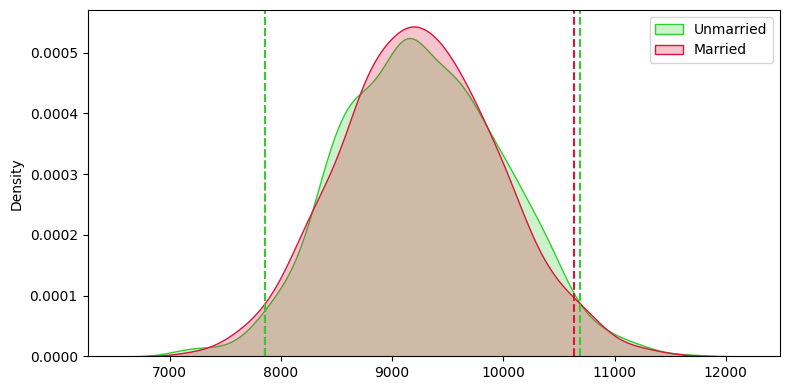

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(data = sample_unmarr_50, color = 'limegreen', label = 'Unmarried', fill = True, ax = ax)
sns.kdeplot(data = sample_marr_50, color = 'crimson', label = 'Married', fill = True, ax = ax)
ax.legend()

for i in interval_95_marr_50:
  plt.axvline(x = i, linestyle = '--', color = 'crimson')

for i in interval_95_unmarr_50:
  plt.axvline(x = i, linestyle = '--', color = 'limegreen')

plt.tight_layout()
plt.show()

**The 95% confidence intervals of the sample means of the marital status feature almost coincide. This is expected to be the case since the average and the std error are not very different from each other. We will now confirm its significance from the t-test.**

**Now that we have sample means of the marital status with us, can perform the t-test. The null and the alternate hypothesis are:**

**Ho : The purchase amount of both type of people is the same.**

**Ha : The purchase amount of unmarried people is more than the married people.**

In [ ]:
# tstat, p_value = ttest_ind(df[df['Gender'] == 'M']["Purchase"], df[df['Gender'] == 'F']["Purchase"], alternative = 'greater')
tstat, p_value = ttest_ind(sample_unmarr_50, sample_marr_50, alternative = 'greater')

print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
  print("The purchase amount of both married and unmarried people is the same (Fail to reject Ho).")
else :
  print("The purchase amount of unmarried people is more than married people (Reject Ho).")

p_value:  0.19149153971292765
The purchase amount of both married and unmarried people is the same (Fail to reject Ho).


## **Analysis of Age v/s Purchase**

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

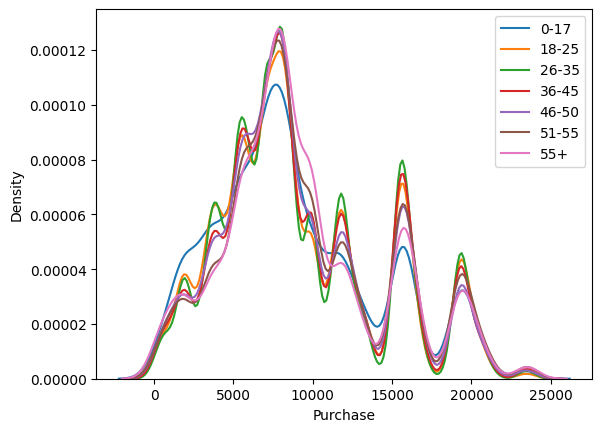

In [ ]:
# Plotting the density function for the marital status.
sns.kdeplot(df[df['Age'] == '0-17']['Purchase'], label = '0-17')
sns.kdeplot(df[df['Age'] == '18-25']['Purchase'], label = '18-25')
sns.kdeplot(df[df['Age'] == '26-35']['Purchase'], label = '26-35')
sns.kdeplot(df[df['Age'] == '36-45']['Purchase'], label = '36-45')
sns.kdeplot(df[df['Age'] == '46-50']['Purchase'], label = '46-50')
sns.kdeplot(df[df['Age'] == '51-55']['Purchase'], label = '51-55')
sns.kdeplot(df[df['Age'] == '55+']['Purchase'], label = '55+')
plt.legend()

**We have sample means of the age groups with us. Since there are more than two categories here, we can move forward with is ANOVA. For ANOVA, we will check if the age categories have equal variances. We use levene test to check this.**

**The null and the alternate hypothesis are:**

**Ho : The variances are the same.**

**Ha : The variances are different.**


In [ ]:
l_test, p_value = levene(df[df['Age'] == '0-17']['Purchase'],
                         df[df['Age'] == '18-25']['Purchase'],
                         df[df['Age'] == '26-35']['Purchase'],
                         df[df['Age'] == '36-45']['Purchase'],
                         df[df['Age'] == '46-50']['Purchase'],
                         df[df['Age'] == '51-55']['Purchase'],
                         df[df['Age'] == '55+']['Purchase'])

print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
  print("The variances are the same (Fail to reject Ho).")
else :
  print("The variances are different (Reject Ho).")

p_value:  6.562221761213431e-13
The variances are different (Reject Ho).


**Since the variances are different, we cannot use ANOVA, We go with the Kruskal's test. The null and the alternate hypothesis are:**

**Ho : The purchase amount of all the age groups is the same.**

**Ha : The purchase amount of at least one age group is different.**

In [ ]:
k_stat, p_value = kruskal(df[df['Age'] == '0-17']['Purchase'],
                         df[df['Age'] == '18-25']['Purchase'],
                         df[df['Age'] == '26-35']['Purchase'],
                         df[df['Age'] == '36-45']['Purchase'],
                         df[df['Age'] == '46-50']['Purchase'],
                         df[df['Age'] == '51-55']['Purchase'],
                         df[df['Age'] == '55+']['Purchase'])

print("p_value: ", p_value)

alpha = 0.05

if p_value > alpha :
  print("The purchase amount of all the age groups is the same (Fail to reject Ho).")
else :
  print("The purchase amount of at least one age group is different (Reject Ho).")

p_value:  3.612251655399266e-65
The purchase amount of at least one age group is different (Reject Ho).
